<a href="https://colab.research.google.com/github/MarcoSuarezECCI/SeminarioBigData/blob/main/AI_Prediccion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluación de modelos

## Librerias

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from google.colab import drive

##------------- Librerias Machine Learning

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE, r2_score
from sklearn.metrics import mean_absolute_error as MAE
import pickle


#------------------ instalación de lightGBM
!pip install lightgbm
import lightgbm as lgb
#------------------ instalación de RandomForest
from sklearn.ensemble import RandomForestRegressor
#------------------ instalación de XGBoost
from sklearn.model_selection import cross_val_score, KFold
import xgboost as xgb
from sklearn.metrics import classification_report

## Obtención de la información

In [90]:
drive.mount('/content/drive', force_remount=True)

file = '/content/drive/MyDrive/data/Articulo/Procesados/Datos_Dengue_Procesado.csv'

cols = ['fechaNotificacion','semana','anio','edad','sexo','estadoCaso','nombreUnidad','departamento','municipio','consecutivo','grupoEtario','anio_semana']

data = pd.read_csv(file, sep=',', names=cols, header=0, encoding='latin-1')


#data = pd.read_excel(file)

print(data.shape)

data.head()

Mounted at /content/drive
(169356, 12)


,fechaNotificacion,semana,anio,edad,sexo,estadoCaso,nombreUnidad,departamento,municipio,consecutivo,grupoEtario,anio_semana
0,2007-09-05,36,2007,8,M,Confirmado por laboratorio,OFICINA DISTRITITAL DE SALUD PUBLICA,ATLANTICO,BARRANQUILLA,1,infancia,200736
1,2007-09-05,36,2007,8,M,Confirmado por laboratorio,OFICINA DISTRITITAL DE SALUD PUBLICA,ATLANTICO,BARRANQUILLA,1,infancia,200736
2,2007-09-05,36,2007,10,F,Confirmado por laboratorio,OFICINA DISTRITITAL DE SALUD PUBLICA,ATLANTICO,BARRANQUILLA,1,infancia,200736
3,2007-09-05,36,2007,10,F,Confirmado por laboratorio,OFICINA DISTRITITAL DE SALUD PUBLICA,ATLANTICO,BARRANQUILLA,1,infancia,200736
4,2007-09-05,36,2007,11,F,Confirmado por laboratorio,OFICINA DISTRITITAL DE SALUD PUBLICA,ATLANTICO,BARRANQUILLA,1,infancia,200736


## Verificar el tipo de datos

In [91]:
data.dtypes

fechaNotificacion    object
semana                int64
anio                  int64
edad                  int64
sexo                 object
estadoCaso           object
nombreUnidad         object
departamento         object
municipio            object
consecutivo           int64
grupoEtario          object
anio_semana           int64
dtype: object

Establecer las columnas de valor

In [100]:
datac = data
datac = datac.drop([
    #'consecutivo',
    'fechaNotificacion','edad','sexo',
    #'estrato','fechaNacimiento',
    'estadoCaso','nombreUnidad',
    #'pais','evento',
    'departamento','municipio','consecutivo'
    ], axis=1)
datac.shape
datac.head()

,semana,anio,grupoEtario,anio_semana
0,36,2007,infancia,200736
1,36,2007,infancia,200736
2,36,2007,infancia,200736
3,36,2007,infancia,200736
4,36,2007,infancia,200736


In [101]:
#datacc = datac.groupby(['anio_semana', 'grupoEtario']).size().reset_index(name='conteo')
datacc = datac.groupby(['anio_semana']).size().reset_index(name='conteo')

datacc.head()

,anio_semana,conteo
0,20071,137
1,20072,56
2,20073,65
3,20074,77
4,20075,107


In [94]:
datacc[['anio_semana', 'conteo']].head()

,anio_semana,conteo
0,20071,30
1,20071,29
2,20071,46
3,20071,15
4,20071,2


## Histogramas

Text(0.5, 1.0, '$grupoEtario$')

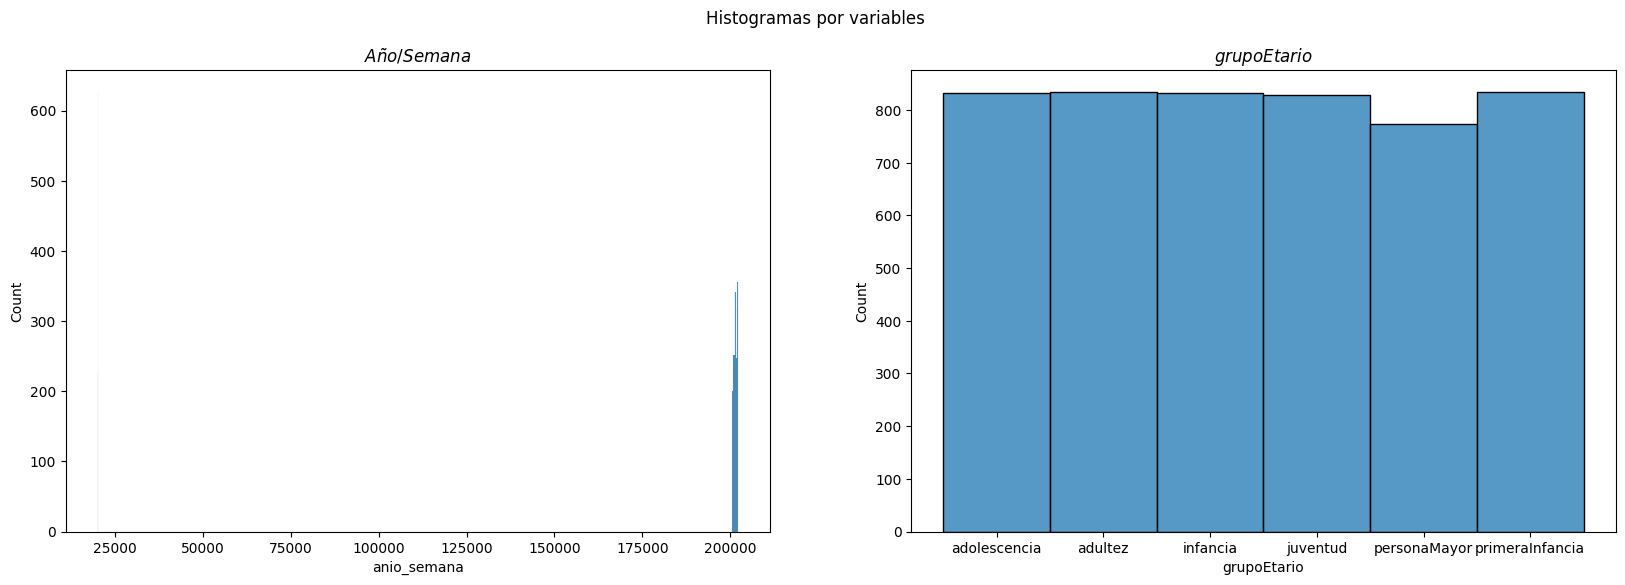

In [79]:
#fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,6))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('Histogramas por variables')
sns.histplot(datacc['anio_semana'], ax=ax1)
ax1.set_title('$Año/Semana$')
sns.histplot(datacc['grupoEtario'], ax=ax2)
ax2.set_title('$grupoEtario$')
#sns.histplot(datacc['anio','semana'], ax=ax3)
#ax3.set_title('$semana$')

## Categorización

In [103]:
#datacc['grupoEtario'] = datacc['grupoEtario'].astype('category')
#datacc.dtypes
#datacc['grupoEtario']  = pd.Categorical(datacc['grupoEtario']).codes

#datacc = datacc.drop(columns=['grupoEtario'])
print(datacc.head(10))

   anio_semana  conteo
0        20071     137
1        20072      56
2        20073      65
3        20074      77
4        20075     107
5        20076     112
6        20077      79
7        20078      39
8        20079      79
9        20081     127


Text(0.5, 1.0, '$Grupo Etario$')

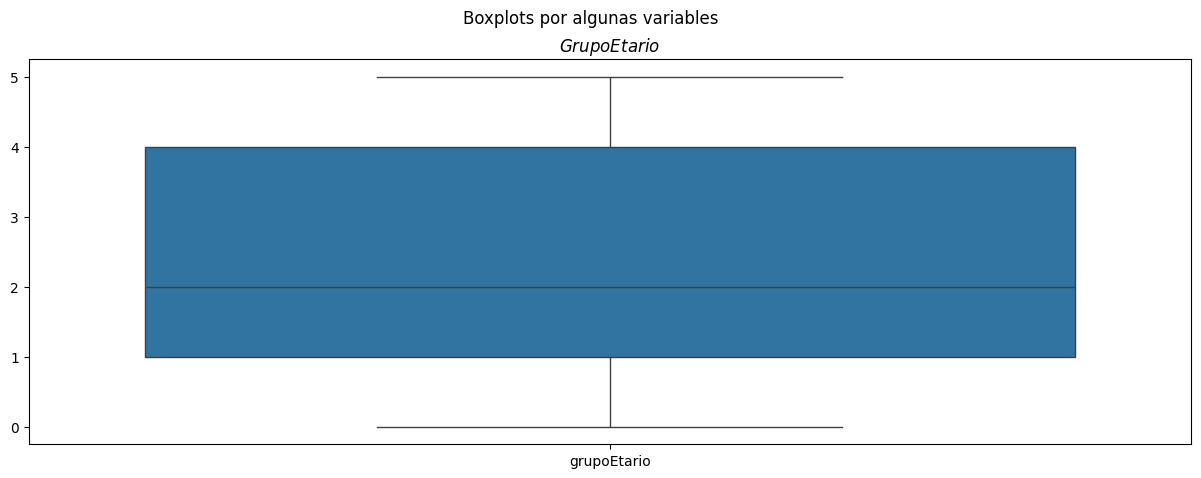

In [81]:
#fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
fig, (ax1) = plt.subplots(1, figsize=(15,5))
fig.suptitle('Boxplots por algunas variables')
sns.boxplot(data=datacc[['grupoEtario']], ax=ax1)
#sns.boxplot(data=datacc[['anio_semana']], ax=ax2)
ax1.set_title('$Grupo Etario$')
#ax2.set_title('$año$')
#sns.boxplot(data=datacc[['kms']], ax=ax3)

## Particionamiento de datos

In [104]:
X = datacc.copy()
X = X.drop(['conteo'], axis=1)
print(X.shape)

Y = pd.DataFrame()
Y = datacc['conteo']
print(Y.shape)

(835, 1)
(835,)


In [105]:
# Data set normalization and partitioning
sc = StandardScaler()
Xsc = sc.fit(X)
Xt = Xsc.transform(X)
Xt.shape

(835, 1)

In [106]:
X_train, X_test, y_train, y_test = split(Xt,Y,
                                         test_size=0.20,
                                         random_state=42)

## Random Forest

In [107]:
model3 = RandomForestRegressor()
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)

In [108]:
# accuracy check
rmse = MSE(y_test, y_pred3, squared=False)
mae = MAE(y_test, y_pred3)
r2 = r2_score(y_test, y_pred3)
print("RMSE: %.2f" % rmse)
print("MAE: %.2f" % mae)
print("R2: %.2f" % r2)

RMSE: 33.87
MAE: 22.61
R2: 0.98


## XGBoost

In [135]:
#Define model
model4 = xgb.XGBRegressor(objective ='reg:squarederror',
                          booster='gbtree',
                          colsample_bytree = 1,
                          importance_type='gain',
                          learning_rate = 0.2,
                          max_depth = 5,
                          alpha = 5,
                          n_estimators = 200,
                          seed=123)

In [136]:
#Training
model4.fit(X_train, y_train)#,
#         eval_set=[(X_train, y_train), (X_test, y_test)], \
#         eval_metric='mlogloss', verbose=False)

XGBRegressor(alpha=5, base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.2, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [137]:
#K-fold cross validation
scores = cross_val_score(model4, X_train, y_train, cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.89


In [138]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(model4, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.90


In [139]:
# Pred
y_pred4 = model4.predict(X_test)

In [140]:
# accuracy check
rmse = MSE(y_test, y_pred4, squared=False)
mae = MAE(y_test, y_pred4)
r2 = r2_score(y_test, y_pred4)
print("RMSE: %.2f" % rmse)
print("MAE: %.2f" % mae)
print("R2: %.2f" % r2)

RMSE: 59.38
MAE: 34.04
R2: 0.93


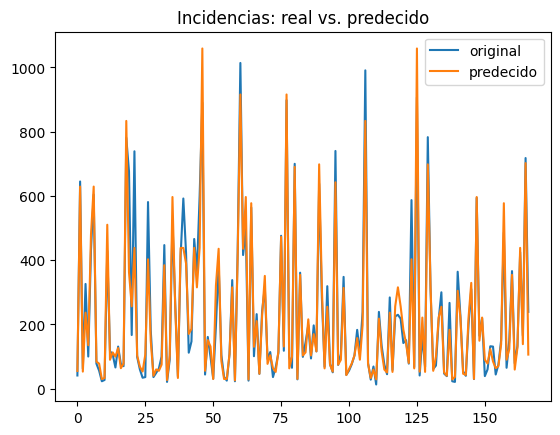

In [141]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred4, label="predecido")
plt.title("Incidencias: real vs. predecido")
plt.legend()
plt.show()

## Light GBM

In [144]:
# Hyperparameters
params = {
    'task': 'train',
    'boosting': 'gbdt',
    'objective': 'regression',
    'num_leaves': 10,
    'learning_rate': 0.05,
    'metric': {'l2','l1'},
    'header' : 'true',
    'verbose': 0
}

# laoding data
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# fitting the model
model2 = lgb.train(params,
                 train_set=lgb_train,
                 valid_sets=lgb_eval)
# Pred
y_pred2 = model2.predict(X_test)

In [145]:
# accuracy check
rmse = MSE(y_test, y_pred2, squared=False)
mae = MAE(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)
print("RMSE: %.2f" % rmse)
print("MAE: %.2f" % mae)
print("R2: %.2f" % r2)

RMSE: 100.55
MAE: 60.52
R2: 0.81


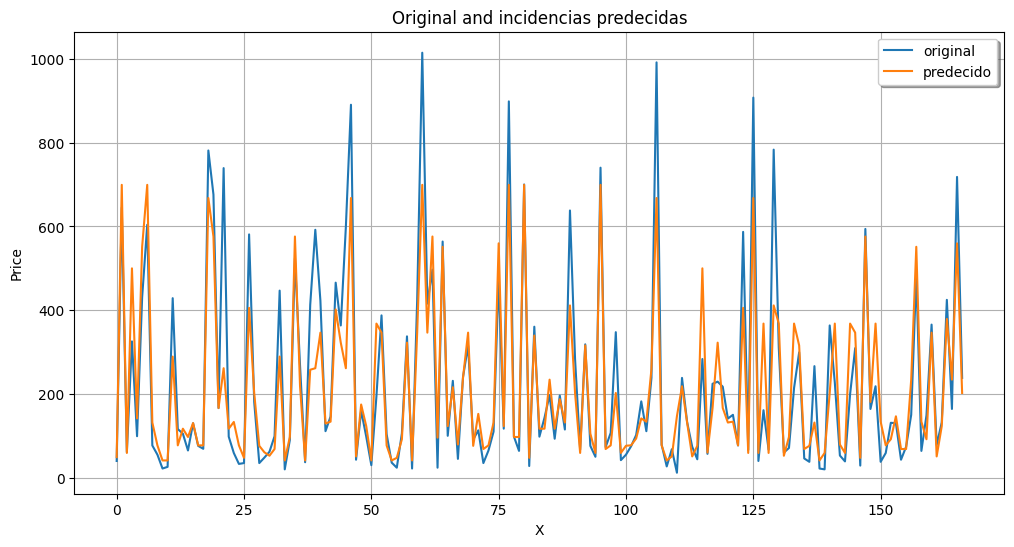

In [146]:
# visualizing in a plot
x_ax = range(len(y_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred2, label="predecido")
plt.title("Original and incidencias predecidas")
plt.xlabel('X')
plt.ylabel('Price')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

# Predicción de modelo con mejor eficiencia

In [151]:
#import array

#grupoEtario = array.reshape(-1,1)

#predictions = model3.predict(data_2023)

#print(f"Predicción de casos de dengue para 2023: {predictions[0]}")


year = 2023
weeks = [f"{year}{week:02d}" for week in range(1, 52)]


df = pd.DataFrame({'anio_semana': weeks})
df['anio_semana'] = df['anio_semana'].astype(int)

#print(df.head(10))

predictions = model3.predict(df)

#print(f"Predicción de casos de dengue para 2023: {predictions[23]}")

for week, prediction in zip(weeks, predictions):
    print(f"Predicción de casos de dengue para la semana {week}: {prediction:.2f}")


Predicción de casos de dengue para la semana 202301: 886.79
Predicción de casos de dengue para la semana 202302: 886.79
Predicción de casos de dengue para la semana 202303: 886.79
Predicción de casos de dengue para la semana 202304: 886.79
Predicción de casos de dengue para la semana 202305: 886.79
Predicción de casos de dengue para la semana 202306: 886.79
Predicción de casos de dengue para la semana 202307: 886.79
Predicción de casos de dengue para la semana 202308: 886.79
Predicción de casos de dengue para la semana 202309: 886.79
Predicción de casos de dengue para la semana 202310: 886.79
Predicción de casos de dengue para la semana 202311: 886.79
Predicción de casos de dengue para la semana 202312: 886.79
Predicción de casos de dengue para la semana 202313: 886.79
Predicción de casos de dengue para la semana 202314: 886.79
Predicción de casos de dengue para la semana 202315: 886.79
Predicción de casos de dengue para la semana 202316: 886.79
Predicción de casos de dengue para la se

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
